# Finding Heavy Traffic Indicators

The goal of this project is to find heavy traffic indicators on a highway, in this case I-94. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

traffic=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

First, lets start off by looking at the first and last few entries in this dataset as well as some basic information to see the gist of this set:

In [2]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


It seems as thought the set is complete with no null values. Some data types may have to be converted into another, however. Lets look at the volume of traffic next.

Text(0, 0.5, 'Count')

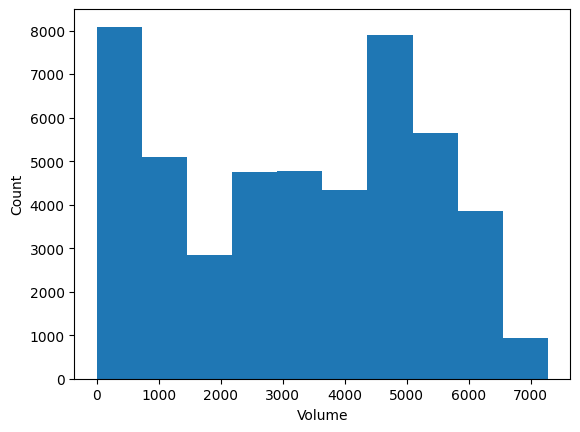

In [5]:
plt.hist(traffic['traffic_volume'])
plt.xlabel('Volume')
plt.ylabel('Count')

Since these are hourly counts, each bar represents the instances of traffic volume per hour. Lets look at some basic statistic for this graph.

In [6]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


Looking at the stats chart and histogram, although there seems to be a few peaks in the graph, the average is around the middle. Instances of traffic volume between 0-1000 seem to be the highest while 6000-7000 are the lowest. Let's divide the data into nighttime and daytime data to see whether or not there is a correlation between time of day and traffic volume.

In [7]:
traffic['date_time']=pd.to_datetime(traffic['date_time'])

daytime_traffic=traffic.copy()[(traffic['date_time'].dt.hour>=7) & (traffic['date_time'].dt.hour<19)]

nighttime_traffic=traffic.copy()[(traffic['date_time'].dt.hour<7) | (traffic['date_time'].dt.hour>=19)]
print(nighttime_traffic.shape)
print(daytime_traffic.shape)

(24327, 9)
(23877, 9)


There seems to be a discrepancy between night time and day time values, likely due to some hour values missing in the dataset. Lets graph these two sets to compare them.

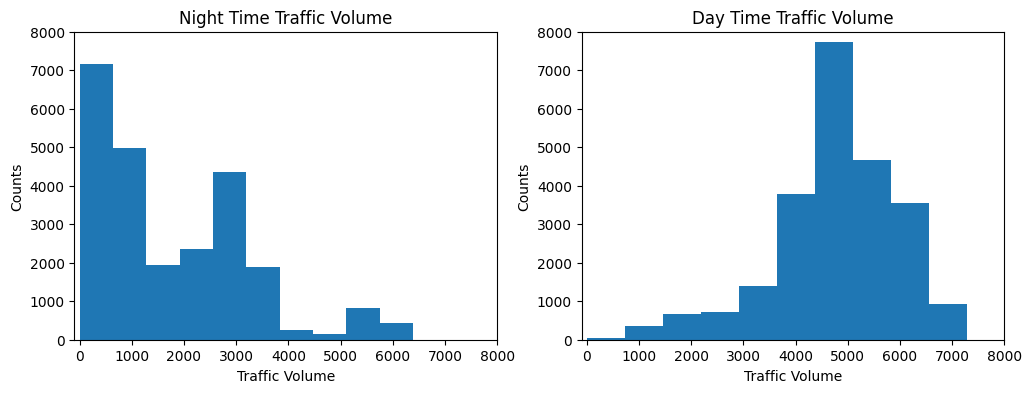

In [8]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(nighttime_traffic['traffic_volume'])
plt.xlim(-100, 8000)
plt.ylim(0,8000)
plt.title('Night Time Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Counts')

plt.subplot(1,2,2)
plt.hist(daytime_traffic['traffic_volume'])
plt.xlim(-100, 8000)
plt.ylim(0,8000)
plt.title('Day Time Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Counts')
plt.show()

Looking at the histograms, it may be possible that there is a correlation between time of day and traffic volume. In the night time histogram, the earlier hours of the night (~7pm) show peak traffic while later in the night the traffic dies down. The opposite is true for the day time traffic. There is a negative correlation between the night and traffic volume while there is a positive correlation between the day and traffic volume. The traffic at night seems to be lighter than in the day time so we will use the day time data to analyze heavy traffic indicators.

In [9]:
daytime_traffic['month'] = daytime_traffic['date_time'].dt.month
by_month = daytime_traffic.groupby('month').mean(numeric_only=True)
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

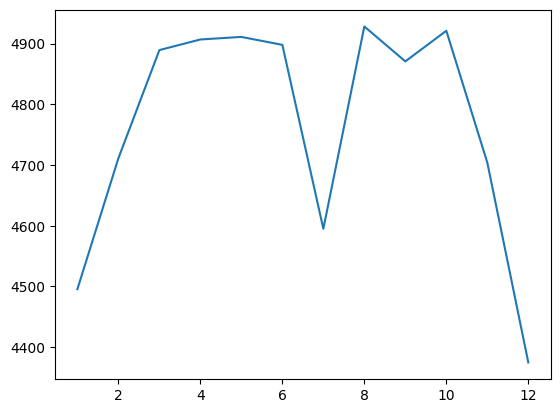

In [10]:
plt.plot(by_month['traffic_volume'])

Looking at the line plot, it seems there are sharp dips in January, July, and December.  The trend seems to be that there is less traffic overall in the cold months (November-February) and high traffic in the warm/cool months (March-October) with a notable exception being July. Lets look further into this data to see what could be the cause of this.

In [11]:
daytime_traffic['dayofweek']=daytime_traffic['date_time'].dt.dayofweek
dayofweek=daytime_traffic.groupby('dayofweek').mean(numeric_only=True)
dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

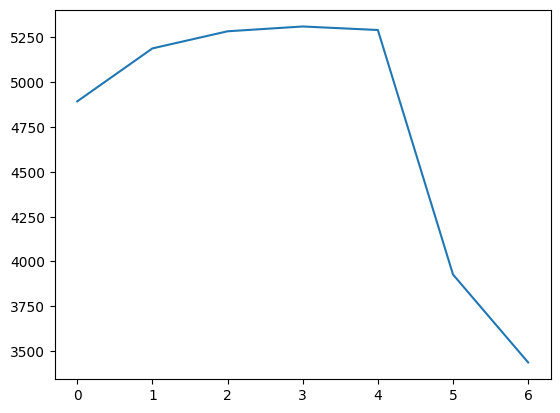

In [12]:
plt.plot(dayofweek['traffic_volume'])

Looking at the week-by-week data, there is a sharp decline in traffic from Friday to Saturday. Traffic is lower on Sunday than on Monday-Thursday, however it is higher than Friday-Saturday. Lets ddelve further into this data by separating the weekday and weekend values.

In [13]:
daytime_traffic['hour']=daytime_traffic['date_time'].dt.hour
weekday=daytime_traffic.copy()[daytime_traffic['dayofweek']<=4]
weekend=daytime_traffic.copy()[daytime_traffic['dayofweek']>=5]
by_weekday=weekday.groupby('hour').mean(numeric_only=True)
by_weekend=weekend.groupby('hour').mean(numeric_only=True)

print(by_weekday['traffic_volume'])
print(by_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


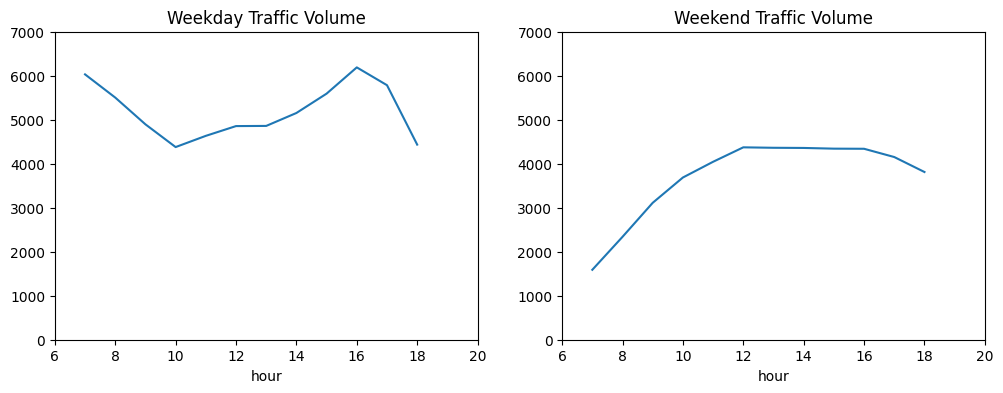

In [14]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
by_weekday['traffic_volume'].plot.line()
plt.ylim(0, 7000)
plt.xlim(6,20)
plt.title('Weekday Traffic Volume')

plt.subplot(1,2,2)
by_weekend['traffic_volume'].plot.line()
plt.ylim(0, 7000)
plt.xlim(6,20)
plt.title('Weekend Traffic Volume')
plt.show()

Looking at the two graphs side by side, we can see that traffic is heavier during the weekday than it is on the weekend. There seems to be a spike in traffic volume at 7am and 4pm, likely due to rush hours. So far we have found heavy traffic indicators related to:
- Season; colder months vs. warmer months
- Day of the week
- Time of the day

Lets look at the weather to see if that reveals any further traffic indicators.

In [15]:
daytime_traffic.corr(numeric_only=True)['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Looking at the chart of correlations, it seems that is temperature has the greatest correlation with the traffic volume

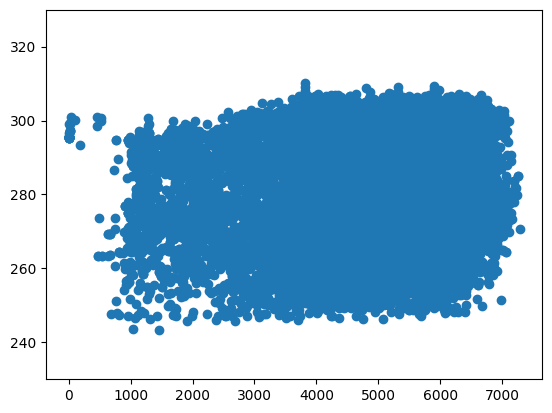

In [16]:
plt.scatter(daytime_traffic['traffic_volume'],daytime_traffic['temp'])
plt.ylim(230,330)
plt.show()

Looking at the scatter plot, it looks homogenous and we can't really say for sure whether or not temperature increases or decreases traffic. Let's look at the different types of weather to see if we can find some answers there.

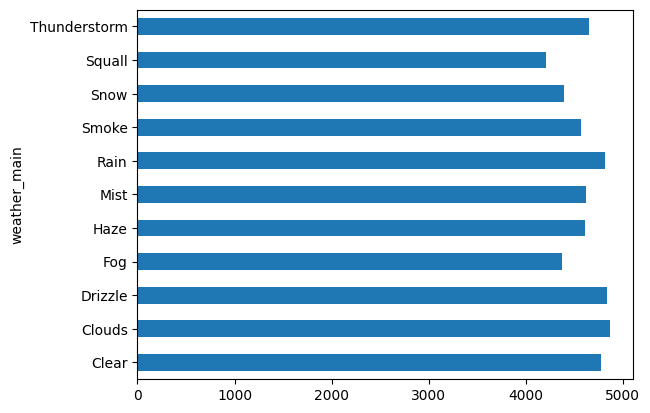

In [17]:
by_weather_main=daytime_traffic.groupby('weather_main').mean(numeric_only=True)
by_weather_desc=daytime_traffic.groupby('weather_description').mean(numeric_only=True)

by_weather_main['traffic_volume'].plot.barh()
plt.show()

Looking at the graph, again, doesn't show a lot of difference between the types of weather in relation to heavy traffic. Lets look at a more detailed report of weather conditions.

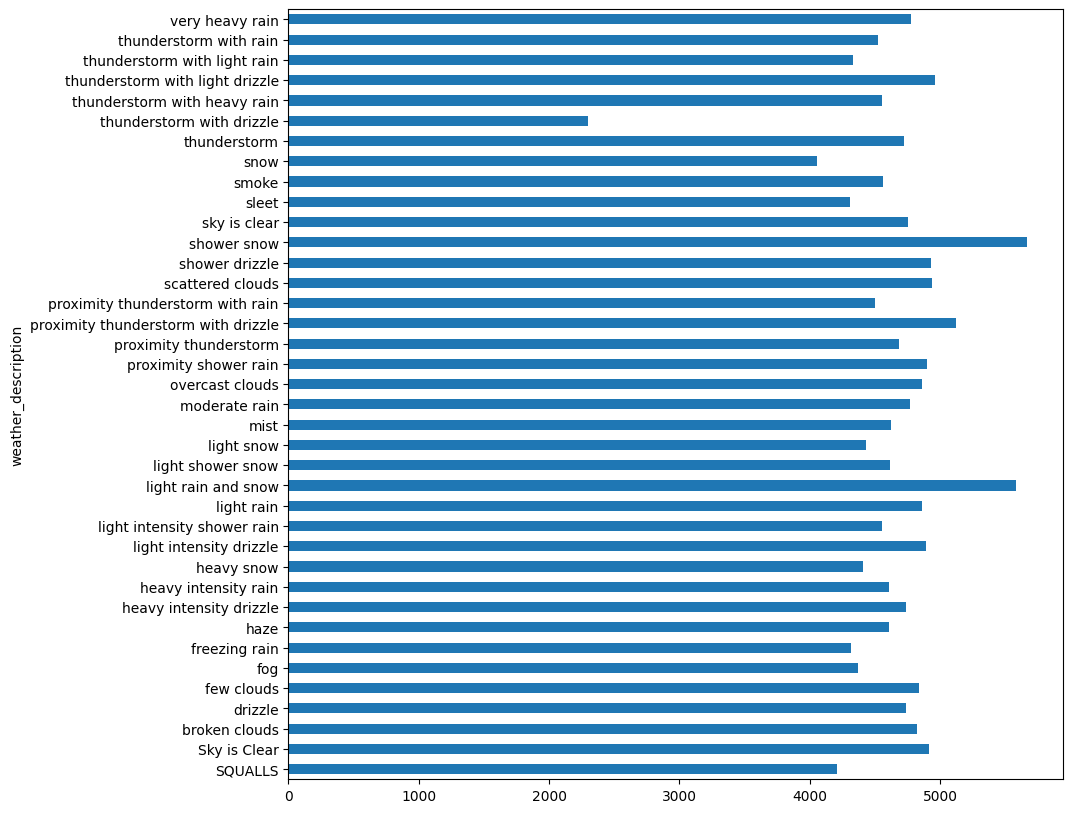

In [18]:
by_weather_desc['traffic_volume'].plot.barh(figsize=(10,10))
plt.show()

Looking at this graph, we can see some weather conditions that have a heavy traffic volume (>5000):
- Shower snow
- Proximity thunderstorm with drizzle
- Light rain and snow
These weather conditions have the highest traffic, but it is not clear from the data why. One would expect better weather to have more traffic but this is not the case.

We have found 6 total indicators of heavy traffic, the 3 just mentioned along with the 3 mentioned in a previous cell:
- Season; colder months vs. warmer months
- Day of the week
- Time of the day
